# **Deep Learning Model To Classify Fashion MNIST Images**

***Rushiblogs*** Building episode 7 Link: [rushiblogs.weebly.com/buildwithrushi](https://rushiblogs.weebly.com/buildwithrushi.html)

More about the Fashion MNIST Dataset: https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/

Enjoy your new year! 2021 :)



---

## **Loading the Dataset**

In [1]:
# Importing important open source libraries
import tensorflow as tf
import numpy as np
import pandas as pd

# For analysis and plotting
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing TensorFlow datasets
import tensorflow_datasets as tfds

In [3]:
# Download the Fashion MNIST dataset from Tensorflow, object tf.data.Dataset
(fashion_train, fashion_test), info = tfds.load('fashion_mnist', split=['train[:60%]', 'test'], with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete9IJ4IM/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete9IJ4IM/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


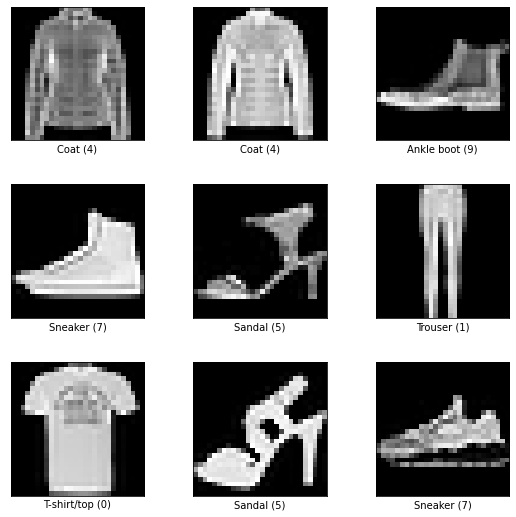

In [ ]:
# Show some examples:
fig = tfds.show_examples(fashion_test, info)

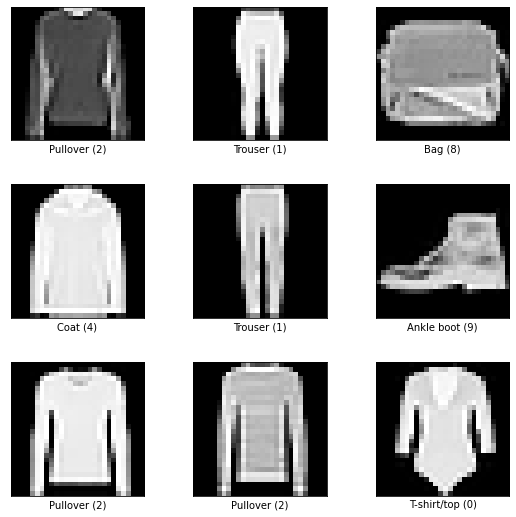

In [ ]:
fig1 = tfds.show_examples(fashion_train, info)

In [ ]:
tfds.as_dataframe(fashion_train.take(7), info)

,image,label
0,,2 (Pullover)
1,,1 (Trouser)
2,,8 (Bag)
3,,4 (Coat)
4,,1 (Trouser)
5,,9 (Ankle boot)
6,,2 (Pullover)


## **Preparing our Model**

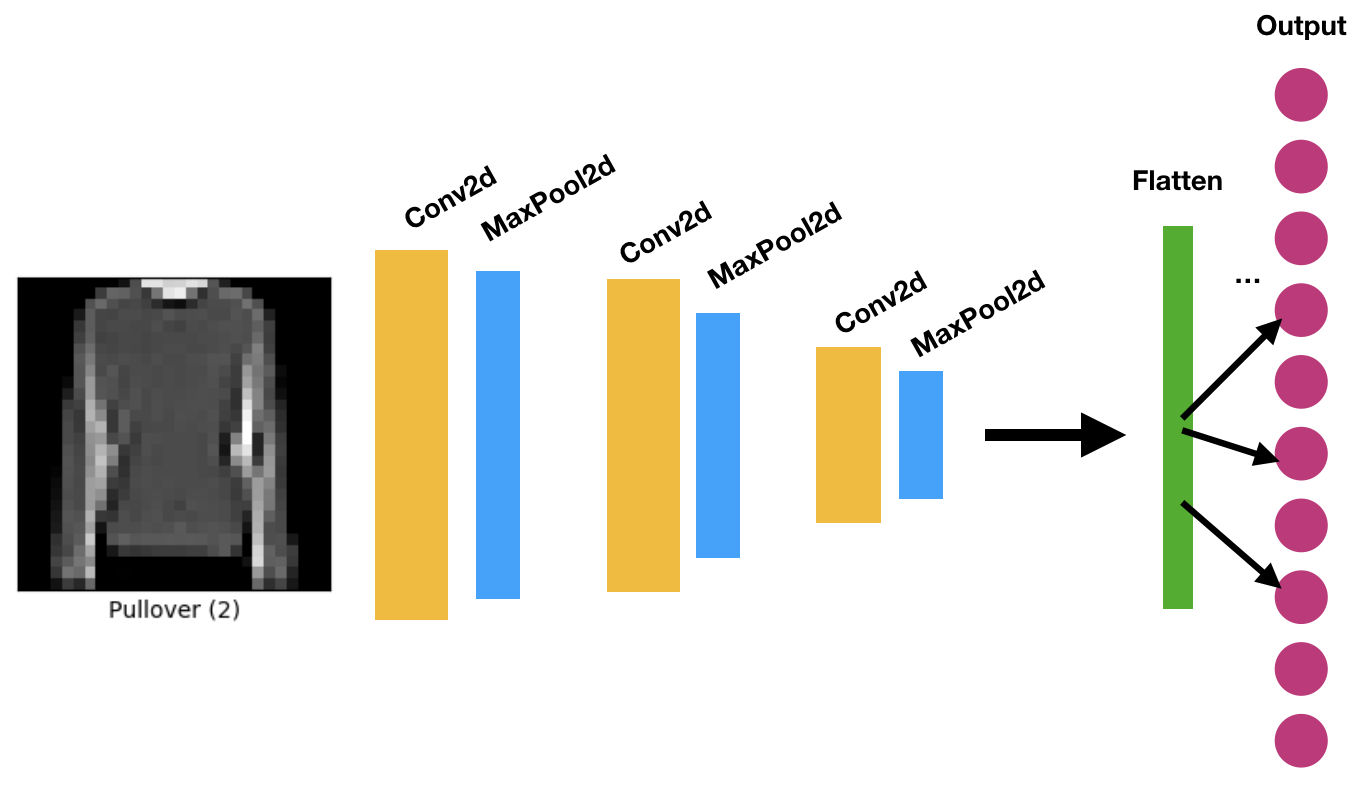

In [4]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [5]:
# Using the Sequential API Model
cnn_model = keras.Sequential()

In [6]:
cnn_model.add(Conv2D(30, input_shape=(28, 28, 1), kernel_size=(2,2), strides=(1,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))

cnn_model.add(Conv2D(25, kernel_size=(2,2), strides=(1,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

cnn_model.add(Conv2D(20, kernel_size=(2,2), strides=(1,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

cnn_model.compile()

cnn_model.add(Flatten())
cnn_model.add(Dense(10, activation='softmax'))

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 30)        150       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 25)        3025      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 25)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 20)        2020      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 20)          0         
_________________________________________________________________
flatten (Flatten)            (None, 500)               0

## **Data Preprocessing - One Hot Encoding**

In [7]:
X_train = []
y_train = []

for i in fashion_train:
  X_train.append(i['image'])
  y_train.append(i['label'])

In [8]:
X_train = np.array(X_train)
X_train.shape

(36000, 28, 28, 1)

In [9]:
y_train = np.array(y_train)
y_train.shape
y_train

array([2, 1, 8, ..., 1, 7, 2])

In [10]:
y_train = tf.one_hot(y_train, 10)

## **Compiling and Fitting Model**

In [11]:
# Normalize dataset
X_train = X_train/255

In [12]:
SGD = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.4)

In [13]:
cnn_model.compile(optimizer=SGD, loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
cnn_model.fit(X_train, y_train, epochs=35, batch_size=150, shuffle=True)

Epoch 1/35
240/240 [==============================] - 8s 5ms/step - loss: 1.3900 - accuracy: 0.5215
Epoch 2/35
240/240 [==============================] - 1s 4ms/step - loss: 0.5094 - accuracy: 0.8113
Epoch 3/35
240/240 [==============================] - 1s 4ms/step - loss: 0.4491 - accuracy: 0.8386
Epoch 4/35
240/240 [==============================] - 1s 4ms/step - loss: 0.4143 - accuracy: 0.8501
Epoch 5/35
240/240 [==============================] - 1s 4ms/step - loss: 0.3931 - accuracy: 0.8574
Epoch 6/35
240/240 [==============================] - 1s 4ms/step - loss: 0.3751 - accuracy: 0.8646
Epoch 7/35
240/240 [==============================] - 1s 4ms/step - loss: 0.3591 - accuracy: 0.8709
Epoch 8/35
240/240 [==============================] - 1s 4ms/step - loss: 0.3485 - accuracy: 0.8739
Epoch 9/35
240/240 [==============================] - 1s 4ms/step - loss: 0.3454 - accuracy: 0.8751
Epoch 10/35
240/240 [==============================] - 1s 4ms/step - loss: 0.3384 - accuracy: 0.8776

In [15]:
X_test = []
y_test = []

for k in fashion_test:
  X_test.append(k['image'])
  y_test.append(k['label'])

In [16]:
X_test = np.array(X_test)
X_test.shape

(10000, 28, 28, 1)

In [17]:
# Normalize testing datset
X_test = X_test/255

In [18]:
y_test = np.array(y_test)
y_test = tf.one_hot(y_test, 10)
y_test

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)>

In [19]:
y_test_1 = []

for k in fashion_test:
  y_test_1.append(k['label'])

In [20]:
y_test_1 = np.array(y_test_1)

## **Evaluating the model**

In [21]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3400 - accuracy: 0.8792


[0.339969277381897, 0.8791999816894531]

In [22]:
predictions = cnn_model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [24]:
print('Predicted Class, Target Class')

for x in np.arange(100):
  print(predictions[x], y_test_1[x])

Predicted Class, Target Class
6 4
6 4
9 9
7 7
5 5
1 1
0 0
5 5
7 7
4 4
0 0
8 8
2 2
3 3
9 9
0 0
5 7
7 7
2 2
2 2
6 0
4 4
4 4
4 4
2 2
7 7
7 7
4 4
2 2
2 4
7 7
5 5
9 9
5 5
4 4
4 4
3 3
3 3
1 1
7 7
5 5
3 3
0 0
0 0
0 0
6 6
9 9
9 9
7 7
6 6
2 2
0 0
0 0
9 9
6 6
1 1
5 5
7 7
0 0
2 2
1 1
9 9
7 7
2 2
4 4
0 6
2 2
2 2
6 6
5 5
1 1
7 5
2 6
2 2
3 3
6 6
4 4
6 6
4 4
0 6
4 4
5 5
8 8
9 9
2 2
5 5
1 1
9 9
7 9
1 1
4 4
1 1
0 0
5 5
8 8
0 0
4 4
2 2
0 0
0 0
